# Air Pollution

### Description
The Air Pollution Data Analytics project aims to analyze air pollution data over several years, focusing on emissions of nitrogen oxides, sulfur dioxides, carbon dioxide (CO2), and volatile organic compounds (VOCs), measured in tonnes per year. The project will also incorporate data on air pollution-related death rates. The dataset covers all countries from the 1970s to the present. The analysis will provide insights into the trends, patterns, and impact of air pollution on a global scale.

## Setting Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import textwrap as tw
import os

In [2]:
## Importing datasets

## Dataset containing pollunant emission by United Kingdom and United States
airp = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Air Pollution/air-pollutant-emissions.csv")

## Dataset containing annual CO2 emission for all countries.
co2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Air Pollution/annual-co2-emissions-per-country.csv")

## Dataset containing air-pollution-related death rates for all countries.
drate = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Air Pollution/death-rate-from-air-pollution-per-100000.csv")

## Dataset containing pollutant emission for OECDs.
oecd = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Air Pollution/oecd_pollutant.csv")



## Data Cleaning

In [3]:
## adding column headers for dataframes.

airp.columns = ["country","country_code","year","nitrogen_oxide","sulfur_dioxide","voc"]

co2.columns = ["country","country_code","year","co2"]

drate.columns = ["country","country_code","year","death_rate"]

In [4]:
## renaming columns with the oecd dataframe.
oecd = oecd.rename(columns = {
    'Entity' : "country",
    "Code":"country_code",
    "Year":"year",
    "Carbon Monoxide (Index)":"co",
    "NOx (Index)" : "nitrogen_oxide",
    'SO₂ (Index)':"sulfur_dioxide"
})

## dropping non-priority columns.
oecd = oecd.drop(columns = ["PM₁₀ (Index)","PM₂.₅ (Index)"],axis=1)

## Data Analysis

### Recent Years (2000 to present)

The Stockholm Convention occurred in 2004, vowing to reduce air pollution globally.

Text(0.5, 1.0, 'Emissions of Nitrogen Oxide by UK and US have been steadily decreasing over the years.')

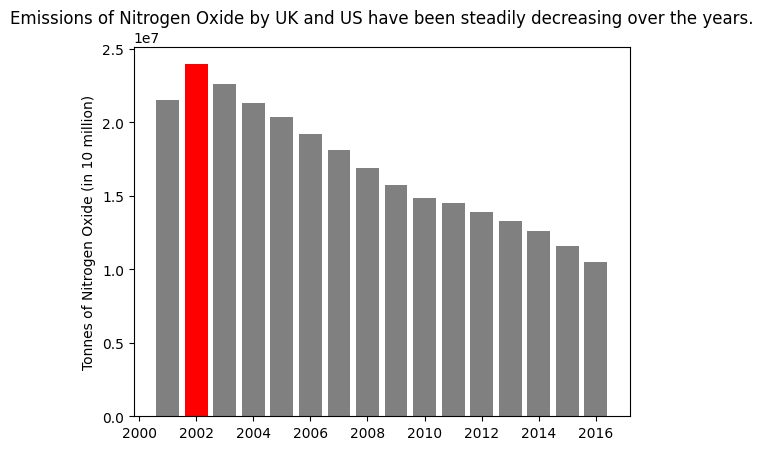

In [5]:
##Nitrogen Oxide emission of United States and United Kingdom combined.

data = airp.loc[airp["year"] > 2000]
data_x = data["year"]
data_y = data["nitrogen_oxide"]

## find the highest value emmission in nitrogen oxide.
maxnox = data_y[data_y.idxmax()]

plt.bar(data_x,data_y,color=["red" if data == maxnox else "gray" for data in data_y])
plt.ylabel("Tonnes of Nitrogen Oxide (in 10 million)")
plt.title("Emissions of Nitrogen Oxide by UK and US have been steadily decreasing over the years.")

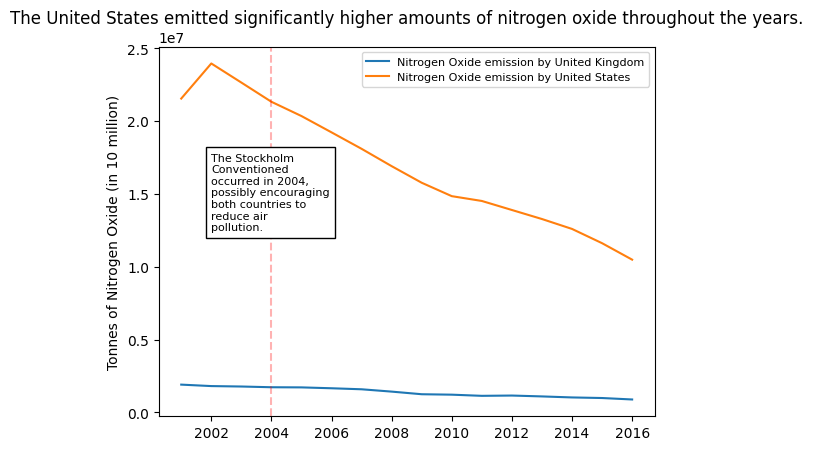

In [6]:
## Nitrogen Oxide emission of both countries throughout the years.

data = airp.loc[airp["year"]>2000]
data_uk = data.loc[airp["country"] == "United Kingdom"]["nitrogen_oxide"]
data_us = data.loc[airp["country"] == "United States"]["nitrogen_oxide"]
data_year = data.loc[airp["country"] == "United Kingdom"]["year"]

plt.plot(data_year,data_uk,label="Nitrogen Oxide emission by United Kingdom")
plt.plot(data_year,data_us,label="Nitrogen Oxide emission by United States")
plt.legend(fontsize=8)
plt.title("The United States emitted significantly higher amounts of nitrogen oxide throughout the years.")
plt.ylabel("Tonnes of Nitrogen Oxide (in 10 million)")

## Plot decorations.
text= tw.fill("The Stockholm Conventioned occurred in 2004, possibly encouraging both countries to reduce air pollution.",width=20)
plt.text(2002,1.25*10_000_000,text,fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})
plt.axvline(x=2004,color="red",linestyle="--",alpha=0.3)


plt.show()
              

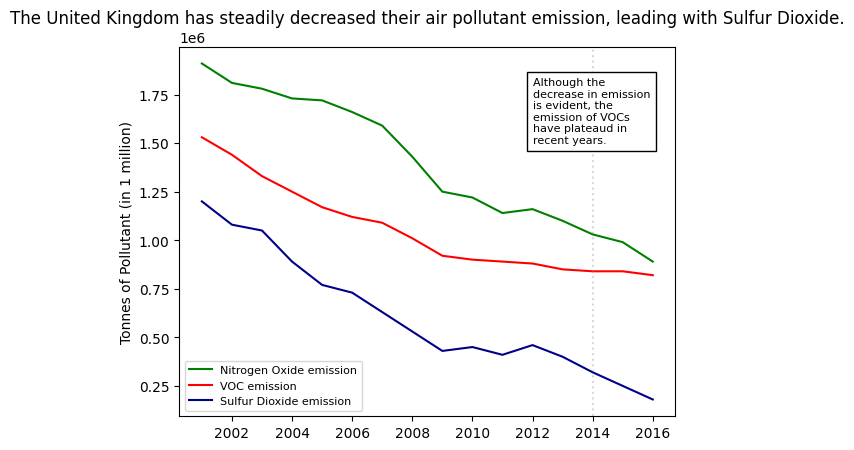

In [7]:
## Air pollutant emission of United Kingdom in recent years

data = airp.loc[airp["year"]>2000]
data_nox = data.loc[airp["country"] == "United Kingdom"]["nitrogen_oxide"]
data_voc = data.loc[airp["country"] == "United Kingdom"]["voc"]
data_so2 = data.loc[airp["country"] == "United Kingdom"]["sulfur_dioxide"]
data_year = data.loc[airp["country"] == "United Kingdom"]["year"]

plt.plot(data_year,data_nox,label="Nitrogen Oxide emission",color="green")
plt.plot(data_year,data_voc,label="VOC emission",color="red")
plt.plot(data_year,data_so2,label="Sulfur Dioxide emission",color="darkblue")
plt.legend(fontsize=8)
plt.title("The United Kingdom has steadily decreased their air pollutant emission, leading with Sulfur Dioxide.")
plt.ylabel("Tonnes of Pollutant (in 1 million)")

## Plot decorations.
text= tw.fill("Although the decrease in emission is evident, the emission of VOCs have plateaud in recent years.",width=20)
plt.text(2012,1.5 * 1_000_000,text,fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})
plt.axvline(x=2014,alpha=0.3,color="gray",linestyle=":")
plt.show()
              

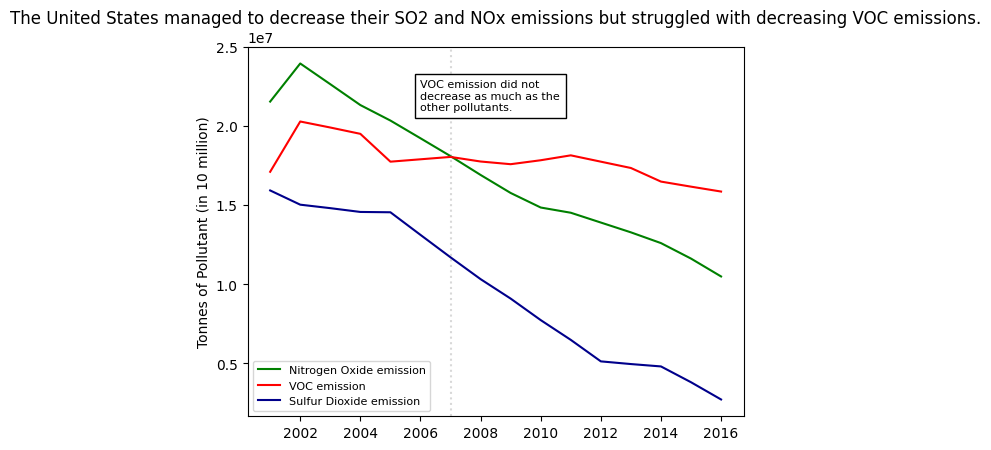

In [8]:
## Air pollutant emission of United States in recent years

data = airp.loc[airp["year"]>2000]
data_nox = data.loc[airp["country"] == "United States"]["nitrogen_oxide"]
data_voc = data.loc[airp["country"] == "United States"]["voc"]
data_so2 = data.loc[airp["country"] == "United States"]["sulfur_dioxide"]
data_year = data.loc[airp["country"] == "United States"]["year"]

plt.plot(data_year,data_nox,label="Nitrogen Oxide emission",color="green")
plt.plot(data_year,data_voc,label="VOC emission",color="red")
plt.plot(data_year,data_so2,label="Sulfur Dioxide emission",color="darkblue")
plt.legend(loc="lower left",fontsize=8)
plt.title("The United States managed to decrease their SO2 and NOx emissions but struggled with decreasing VOC emissions.")
plt.ylabel("Tonnes of Pollutant (in 10 million)")

## Plot decorations.
text= tw.fill("VOC emission did not decrease as much as the other pollutants.",width=25)
plt.text(2006,2.10 * 10_000_000,text,fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})
plt.axvline(x=2007,alpha=0.3,color="gray",linestyle=":")
plt.show()
              

<function matplotlib.pyplot.show(close=None, block=None)>

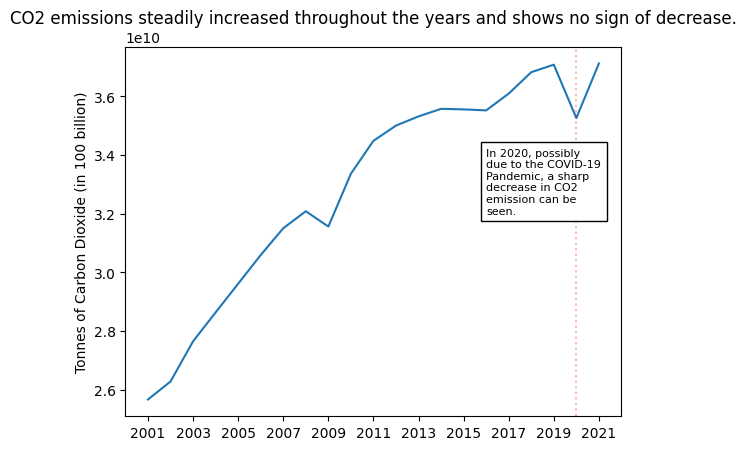

In [9]:
## Plotting the CO2 emission of the entire world.
data = co2.loc[co2["year"]>2000]
data = data.loc[data["country"] == "World"][["year","country","co2"]]
data_x = data["year"]
data_y = data["co2"]

plt.plot(data_x,data_y)

plt.title("CO2 emissions steadily increased throughout the years and shows no sign of decrease.")
plt.ylabel("Tonnes of Carbon Dioxide (in 100 billion)")
plt.xticks(data_x[::2])
plt.axvline(x=2020,alpha=0.3,color="red",linestyle=":")

text = tw.fill("In 2020, possibly due to the COVID-19 Pandemic, a sharp decrease in CO2 emission can be seen.",width=20)
plt.text(2016,3.2 * 1e10,text,fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})
plt.show

<ipython-input-10-7b9d61d729e0>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby("country").agg("sum")["co2"].to_frame()


<BarContainer object of 5 artists>

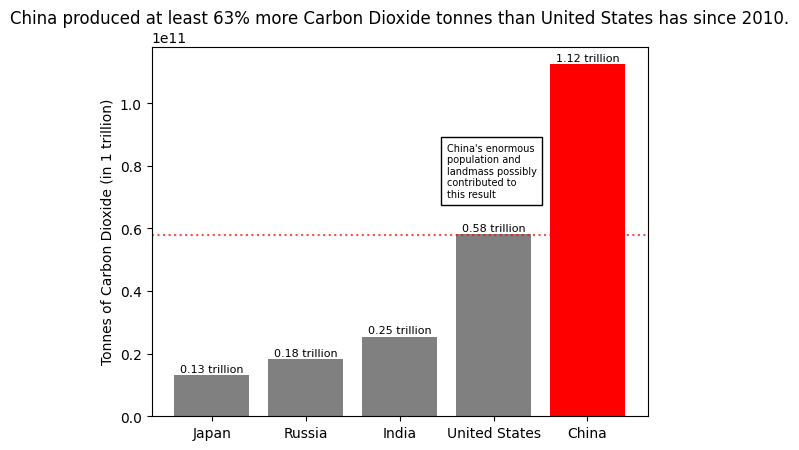

In [10]:
## Countries with the highest cumulative emission these past 10 years.
data = co2.loc[co2["year"] > 2010]

## Countries that have the highest emission of CO2
data = data.loc[data["country"].isin(["China","United States","India","Russia","Japan"])]
data = data.groupby("country").agg("sum")["co2"].to_frame()
data = data.sort_values("co2",ascending=True)

data_x = data.index
data_y = data["co2"]

plt.title("China produced at least 63% more Carbon Dioxide tonnes than United States has since 2010.")
plt.ylabel("Tonnes of Carbon Dioxide (in 1 trillion)")
##plt.axvline(x=0.6,linestyle="--",alpha=0.3)
plt.axhline(0.58*100_000_000_000,alpha=0.7,color="red",linestyle=":")
for i, v in enumerate(data_y):
  plt.text(i,v + 1_000_000_000,str(round(v/1e11,2))+" trillion",ha="center",fontsize=8)

text = tw.fill("China's enormous population and landmass possibly contributed to this result",width=18)
plt.text(2.5,0.7*1e11,text,fontsize=7,bbox={"facecolor":"white","edgecolor":"black"})
plt.bar(data_x,data_y,color=["red" if country == "China" else "gray" for country in data_x])


<ipython-input-11-1b9d8f7bf160>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = data.groupby("country").agg("sum")["co2"].to_frame()


<BarContainer object of 6 artists>

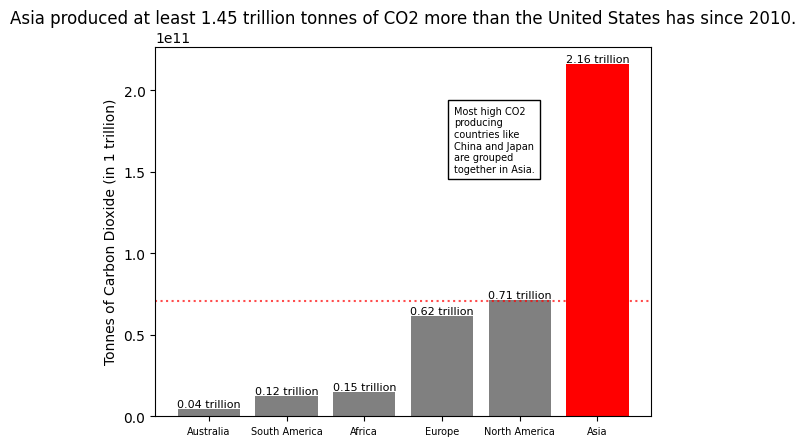

In [11]:
## Assessing CO2 emissions of each continents since 2010
data = co2.loc[co2["year"] > 2010]

## All continents (There are no recent data from Antarctica)
data = data.loc[data["country"].isin(["Asia","Europe","North America","South America","Africa","Antartica","Australia"])]
data = data.groupby("country").agg("sum")["co2"].to_frame()
data = data.sort_values("co2",ascending=True)

data_x = data.index
data_y = data["co2"]

plt.title("Asia produced at least 1.45 trillion tonnes of CO2 more than the United States has since 2010.")
plt.xticks(fontsize=7)
plt.ylabel("Tonnes of Carbon Dioxide (in 1 trillion)")
##plt.axvline(x=0.6,linestyle="--",alpha=0.3)
plt.axhline(0.71*100_000_000_000,alpha=0.7,color="red",linestyle=":")
for i, v in enumerate(data_y):
  plt.text(i,v + 1_000_000_000,str(round(v/1e11,2))+" trillion",ha="center",fontsize=8)

text = tw.fill("Most high CO2 producing countries like China and Japan are grouped together in Asia.",width=18)
plt.text(3.15,1.5*1e11,text,fontsize=7,bbox={"facecolor":"white","edgecolor":"black"})
plt.bar(data_x,data_y,color=["red" if country == "Asia" else "gray" for country in data_x])


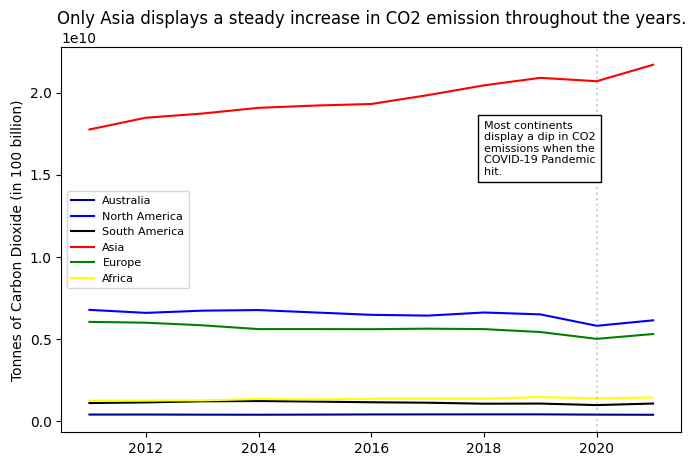

In [12]:
## Assessing CO2 emissions of each continents since 2010 over the years.
data = co2.loc[co2["year"] > 2010]

## All continents (There are no recent data from Antarctica
data_aus = data.loc[data["country"] == "Australia"]["co2"]
data_nam = data.loc[data["country"] == "North America"]["co2"]
data_sam = data.loc[data["country"] == "South America"]["co2"]
data_asia = data.loc[data["country"] == "Asia"]["co2"]
data_eu = data.loc[data["country"] == "Europe"]["co2"]
data_afr = data.loc[data["country"] == "Africa"]["co2"]
plt.figure(figsize=(8,5))

plt.plot(data.loc[data["country"] == "Australia"]["year"],data_aus,label="Australia",color="darkblue")
plt.plot(data.loc[data["country"] == "North America"]["year"],data_nam,label="North America",color = "blue")
plt.plot(data.loc[data["country"] == "South America"]["year"],data_sam,label="South America",color="black")
plt.plot(data.loc[data["country"] == "Asia"]["year"],data_asia,label="Asia",color="red")
plt.plot(data.loc[data["country"] == "Europe"]["year"],data_eu,label="Europe",color="green")
plt.plot(data.loc[data["country"] == "Africa"]["year"],data_afr,label="Africa",color="yellow")

plt.legend(loc="center left",fontsize=8)
plt.title("Only Asia displays a steady increase in CO2 emission throughout the years.")
plt.axvline(x=2020,alpha=0.3,linestyle=":")
text = tw.fill("Most continents display a dip in CO2 emissions when the COVID-19 Pandemic hit.",width=20)
plt.ylabel("Tonnes of Carbon Dioxide (in 100 billion)")
plt.text(2018,1.5*1e10,text,fontsize=8,bbox={"facecolor":"white","edgecolor":"black"})
plt.show()


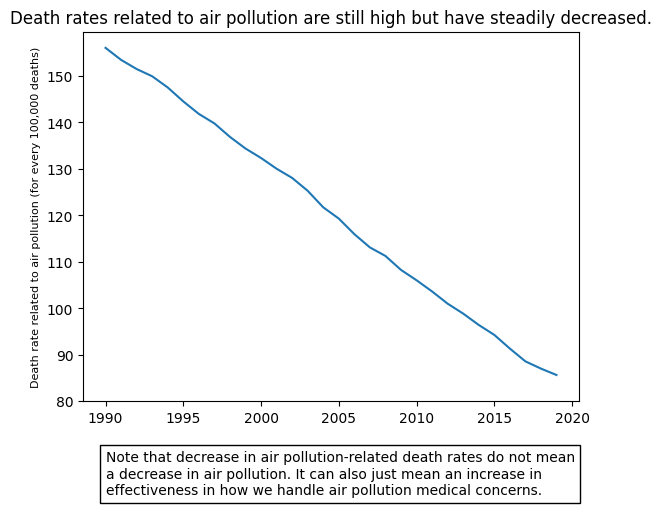

In [41]:
## Plotting death rates of the world.

data = drate.loc[drate["year"] > 2010]
data_x = drate.loc[drate["country"] == "World"]["year"]
data_y = drate.loc[drate["country"] == "World"]["death_rate"]


plt.plot(data_x,data_y)
plt.ylabel("Death rate related to air pollution (for every 100,000 deaths)",fontsize=8)
plt.ylim(80)
plt.title("Death rates related to air pollution are still high but have steadily decreased.")

text = tw.fill("Note that decrease in air pollution-related death rates do not mean a decrease in air pollution. It can also just mean an increase in effectiveness in how we handle air pollution medical concerns.",width=68)
plt.text(1990,60,text,bbox={"facecolor":"white","edgecolor":"black"})
plt.show()

<BarContainer object of 10 artists>

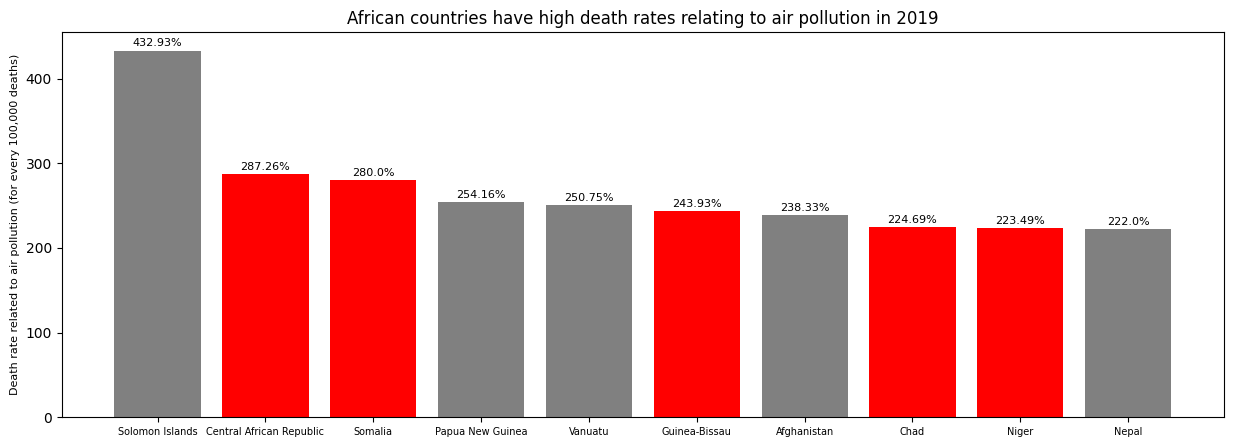

In [74]:
## Plotting countries with the highest death rates in 2019

data = drate.loc[drate["year"] == 2019].sort_values(by="death_rate",ascending=False)
data = data.head(10)
data_x = data["country"]
data_y = data["death_rate"]

plt.figure(figsize=(15,5))
plt.xticks(fontsize=7)
plt.title("African countries have high death rates relating to air pollution in 2019")
plt.ylabel("Death rate related to air pollution (for every 100,000 deaths)",fontsize=8)

for i,v in enumerate(data_y):
  plt.text(i,v+5,str(v)+"%",ha="center",fontsize=8)



plt.bar(data_x,data_y,color=["red" if country in ["Central African Republic","Somalia","Guinea-Bissau","Chad","Niger"] else "gray" for country in data["country"]])

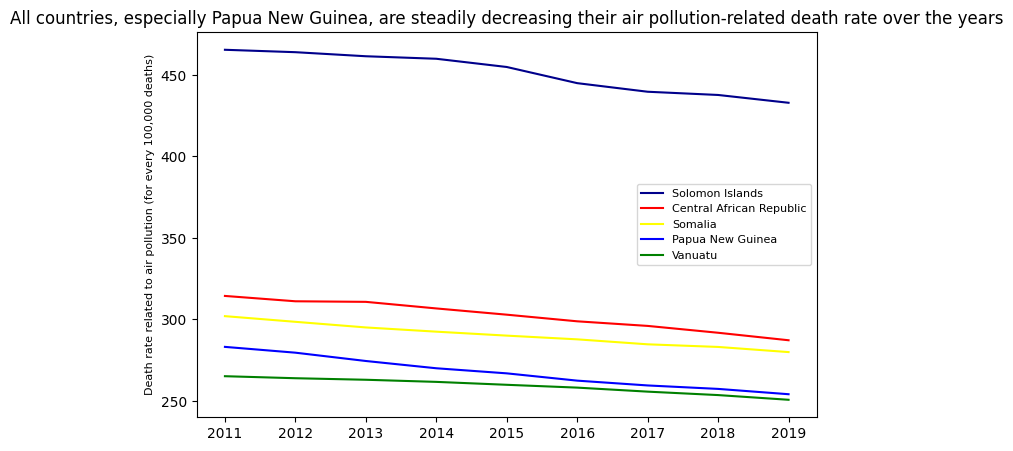

In [110]:
## Plotting the top 5 countries in the previous graph in terms of air pollution death rates throughout the last 10 years.
data = drate.loc[drate["year"] > 2010]
data_sol = data.loc[data["country"] == "Solomon Islands"]["death_rate"]
data_car = data.loc[data["country"] == "Central African Republic"]["death_rate"]
data_som = data.loc[data["country"] == "Somalia"]["death_rate"]
data_pap = data.loc[data["country"] == "Papua New Guinea"]["death_rate"]
data_van = data.loc[data["country"] == "Vanuatu"]["death_rate"]
data_year = data.loc[data["country"] == "Solomon Islands"]["year"]

plt.figure(figsize=(8,5))
plt.plot(data_year,data_sol,label="Solomon Islands",color="darkblue")
plt.plot(data_year,data_car,label="Central African Republic",color="red")
plt.plot(data_year,data_som,label="Somalia",color="yellow")
plt.plot(data_year,data_pap,label="Papua New Guinea",color="blue")
plt.plot(data_year,data_van,label="Vanuatu",color="green")


plt.ylabel("Death rate related to air pollution (for every 100,000 deaths)",fontsize=8)
plt.title("All countries, especially Papua New Guinea, are steadily decreasing their air pollution-related death rate over the years")

plt.legend(fontsize=8)

plt.show()